In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

##### 8.

In [2]:
auto_df = pd.read_csv('./data/Auto.csv', na_values=['?'])
auto_df.dropna(inplace=True)
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


**(a)**

In [3]:
X = pd.DataFrame({'intercept': np.ones(auto_df.shape[0]),
                  'horsepower': auto_df['horsepower']})
X

,intercept,horsepower
0,1.0,130.0
1,1.0,165.0
2,1.0,150.0
3,1.0,150.0
4,1.0,140.0
...,...,...
392,1.0,86.0
393,1.0,52.0
394,1.0,84.0
395,1.0,79.0


In [4]:
y = auto_df['mpg']
model = sm.OLS(y, X)
results = model.fit()

In [5]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           7.03e-81
Time:                        21:41:01   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


**A:** \
*i.* The coefficient for *horsepower* is non-zero with significant *p-value*. Hence, there is a relationship between *horsepower* and *mpg* \
*ii.* (Take $R^2$ into consideration? This might not be the best method because how significant it is also depends on the complexity of the problem. In this case, the model was significantly simplified so having $R^2$ = 0.605 might not be enough) \
*iii.* Negative \
*iv.* There are multiple ways to accomplish this prediction

- Utilizing `params`

In [7]:
def get_new_prediction(params, new_X):
    """Get new prediction(s) from `new_X`
    """
    predictions = []
    for x in new_X:
        predictions.append(params @ np.array([1, x]))
    return predictions

new_y = get_new_prediction(results.params, [98])
new_y

[24.46707715251242]

- Utilizing `get_prediction()`

In [8]:
# design = MS(['horsepower']).fit(auto_df)
# new_df = pd.DataFrame({'horsepower': [98]})
# new_X = design.transform(new_df)
new_X_input = [98]
new_X = pd.DataFrame({'intercept': np.ones(len(new_X_input)),
                      'horsepower': np.array(new_X_input)})
new_X

,intercept,horsepower
0,1.0,98


In [9]:
new_y = results.get_prediction(new_X);
new_y.predicted_mean

array([24.46707715])

- Confidence Interval

In [10]:
new_y.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [11]:
new_y.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

**(b)**

- Using `abline()` from the lab

In [12]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

/var/folders/pd/8hy6tr792sb5d5lgkbz_wpp40000gn/T/ipykernel_12875/122680404.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/var/folders/pd/8hy6tr792sb5d5lgkbz_wpp40000gn/T/ipykernel_12875/122680404.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


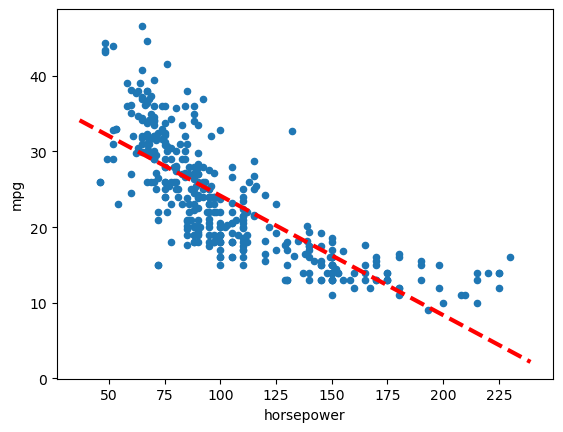

In [13]:
ax = auto_df.plot.scatter('horsepower', 'mpg')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

- Using `axline()` method from `matplotlib`

/var/folders/pd/8hy6tr792sb5d5lgkbz_wpp40000gn/T/ipykernel_12875/4142773686.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axline(xy1=(xlim[0], xlim[0]*results.params[1]+results.params[0]),
/var/folders/pd/8hy6tr792sb5d5lgkbz_wpp40000gn/T/ipykernel_12875/4142773686.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope=results.params[1],


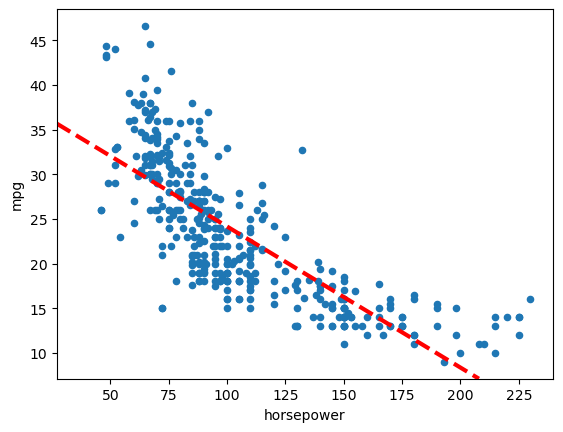

In [14]:
ax = auto_df.plot.scatter('horsepower', 'mpg')
xlim = ax.get_xlim()
ax.axline(xy1=(xlim[0], xlim[0]*results.params[1]+results.params[0]),
          slope=results.params[1],
          linestyle='--', color='red', linewidth=3);

**(c)**

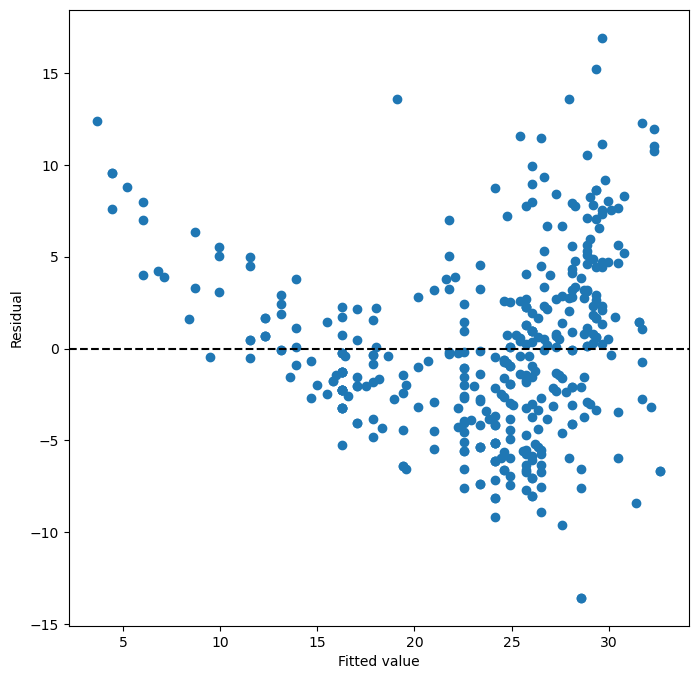

In [15]:
_, ax = subplots(figsize=(8,8))
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

**A:** *Residual vs. Fitted Values* indicates that the true relationship between predictor and response is non-linear. There is a pattern in the plot.

115


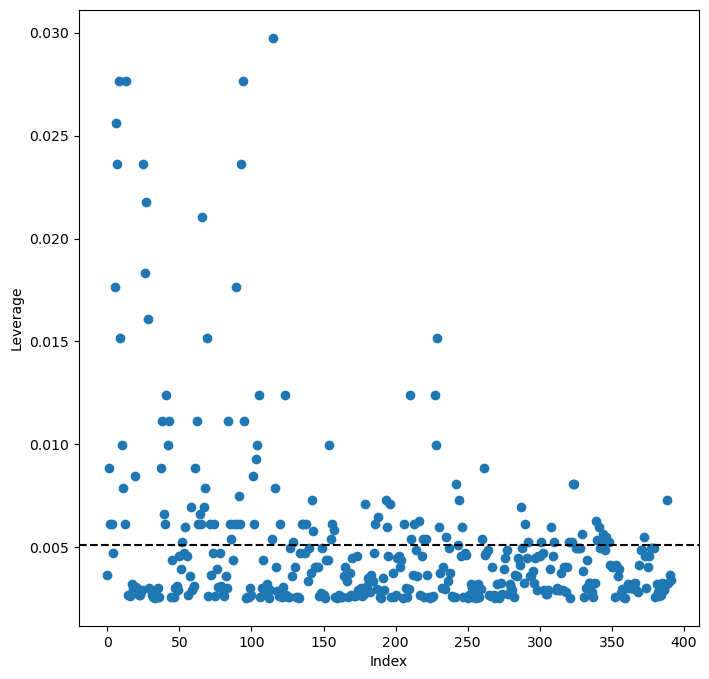

In [16]:
infl = results.get_influence()
_, ax = subplots(figsize=(8,8))
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
print(np.argmax(infl.hat_matrix_diag))
ax.axhline((1 + 1) / X.shape[0], c='k', ls='--');

**A:** The cutoff limit for a high leverage point is given by $ h_i = \frac{p+1}{n} = \frac{2}{392} \approx 0.005. With many points lie above this threshold, we have a large number of *high leverage points*

##### 9.

**(a)**

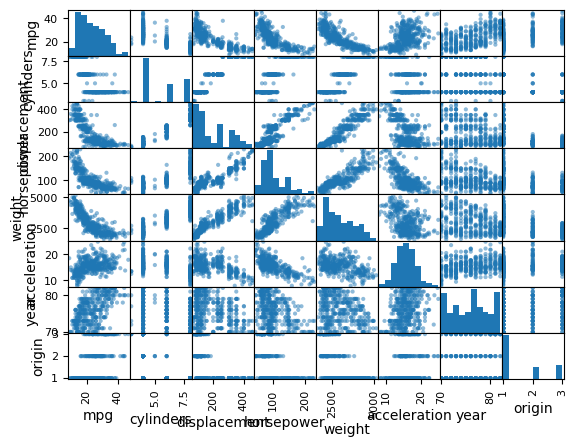

In [17]:
pd.plotting.scatter_matrix(auto_df);

**(b)**

In [18]:
auto_df.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


**(c)**

In [19]:
terms = auto_df.columns.drop(['name', 'mpg'])
terms

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [20]:
X = MS(terms).fit_transform(auto_df)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)


,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [21]:
model_formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'

anova_model = smf.ols(model_formula, data=auto_df).fit()
anova_results = anova_lm(anova_model)
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
cylinders,1.0,14403.083079,14403.083079,1300.683788,2.319511e-125
displacement,1.0,1073.344025,1073.344025,96.929329,1.530906e-20
horsepower,1.0,403.408069,403.408069,36.430140,3.731128e-09
weight,1.0,975.724953,975.724953,88.113748,5.544461e-19
acceleration,1.0,0.966071,0.966071,0.087242,7.678728e-01
year,1.0,2419.120249,2419.120249,218.460900,1.875281e-39
origin,1.0,291.134494,291.134494,26.291171,4.665681e-07
Residual,384.0,4252.212530,11.073470,NaN,NaN


**A:**
- *i.* All predictors have significant *p-value* except for `acceleration`. There is a relationship between all other predictor and the response
- *ii.* Statistical relation is explained by the *F-statistic* (proportion of the variance explained by the model). From the table, we can see that `cylinder` has the most influence on the response, followed by `year` and the rest
- *iii.* The coefficient for `year` is 0.7508 with significant *p-value*. It means that a unit of increase in year leads to, on average, an increase of 0.7508 mpg

**(d)**

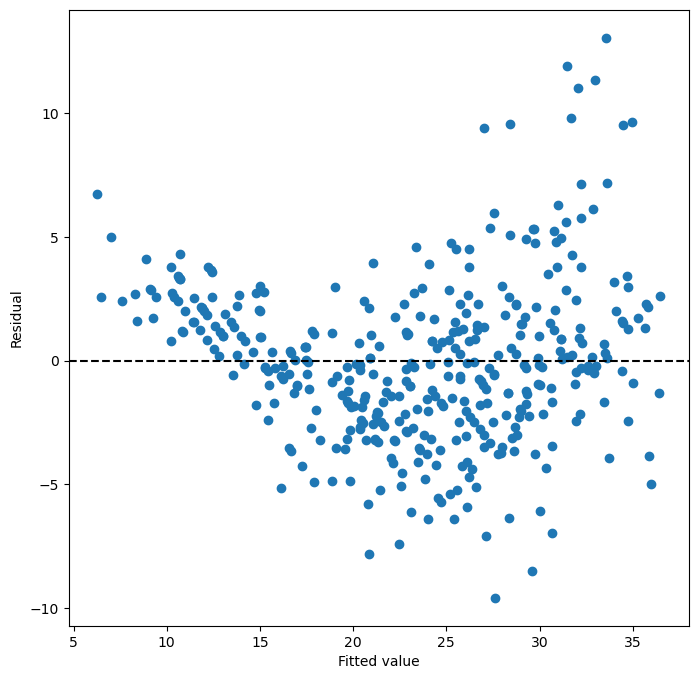

In [22]:
_, ax = subplots(figsize=(8,8))
ax.scatter(anova_model.fittedvalues, anova_model.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

In [23]:
def studentize_residual(n, m, residuals, leverage):
    """Calculate external studentized residual for all observations
    
    Reference: https://en.wikipedia.org/wiki/Studentized_residual
    """

    sigma_hat_square = np.array([
        np.sum(np.square(np.delete(residuals, i))) / (n - m - 2)
        for i in range(n)
    ])
    t = residuals / (np.sqrt(sigma_hat_square * (1 - leverage)))
    return t
    

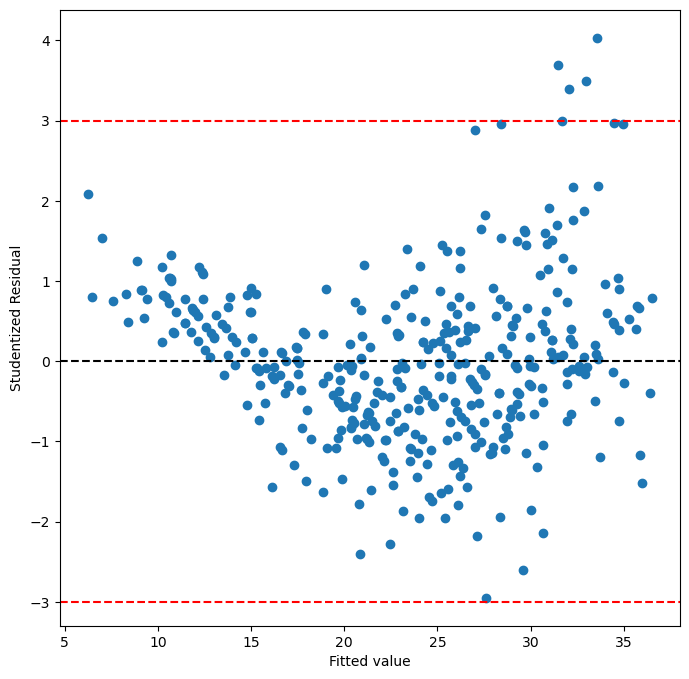

In [24]:
studentized_residual = studentize_residual(X.shape[0],
                                           len(terms) - 1,
                                           anova_model.resid,
                                           anova_model.get_influence().hat_matrix_diag)
_, ax = subplots(figsize=(8,8))
ax.scatter(anova_model.fittedvalues, studentized_residual)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Studentized Residual')
ax.axhline(0, c='k', ls='--')
ax.axhline(3, c='r', ls='--')
ax.axhline(-3, c='r', ls='--');

13


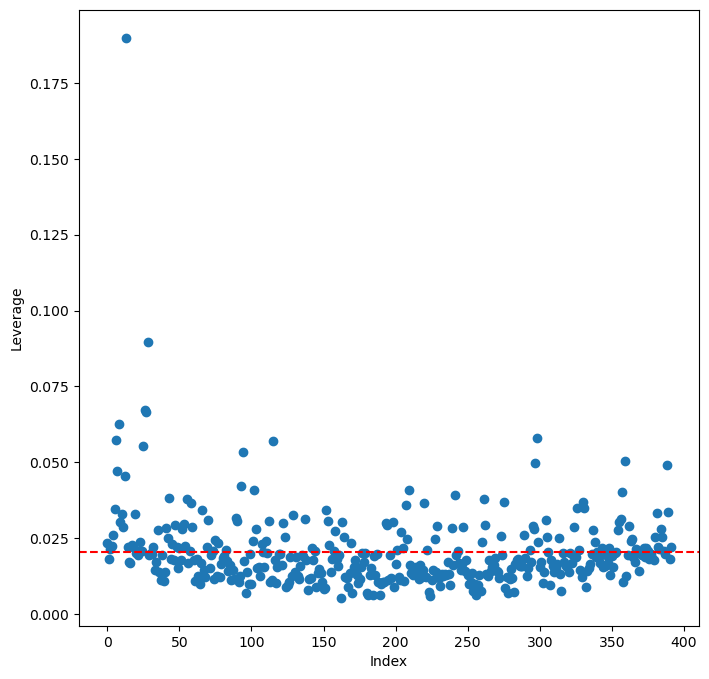

In [25]:
infl = anova_model.get_influence()
_, ax = subplots(figsize=(8,8))
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
print(np.argmax(infl.hat_matrix_diag))
ax.axhline((1 + len(terms)) / X.shape[0], c='r', ls='--', label='Leverage limit');

**A:**
- From the Studentized Residuals vs. Fitted Values plot, we can see that there are 4 points that can be considered outliers. This is not particularly large considering the dataset has 392 observations in total. Remediation for this can be removing these points from the dataset.
- The new model with more all the predictors seems to have a much greater amount of points with high leverage. (*This is unusually large amount if we consider the hard cutoff value. However, if consider the graph without it, we can see that only a few points can be considered as such. I am not fully confident about the answer*)

**(e)**

In [26]:
from itertools import combinations


terms_with_interaction = [(a, b) for a, b in combinations(terms, 2)]
terms_with_interaction = terms.values.tolist() + terms_with_interaction


In [27]:
X = MS([
    term for term in terms_with_interaction
]).fit_transform(auto_df)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,35.478900,53.136000,0.668,0.505
cylinders,6.988600,8.248000,0.847,0.397
displacement,-0.478500,0.189000,-2.527,0.012
horsepower,0.503400,0.347000,1.451,0.148
weight,0.004100,0.018000,0.235,0.814
acceleration,-5.859200,2.174000,-2.696,0.007
year,0.697400,0.610000,1.144,0.253
origin,-20.895600,7.097000,-2.944,0.003
cylinders:displacement,-0.003400,0.006000,-0.524,0.601
cylinders:horsepower,0.011600,0.024000,0.480,0.632


In [28]:
results.pvalues[results.pvalues < 0.05]

displacement           0.011921
acceleration           0.007354
origin                 0.003446
displacement:year      0.013516
acceleration:year      0.030331
acceleration:origin    0.003655
dtype: float64

**A:** Of all the interaction terms, only 3 pairs have significant *p-value* to conclude there exists interaction between the predictors

**(f) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?**

In [29]:
f_model = [poly('cylinders', degree=2)]
X = MS(f_model).fit_transform(auto_df)
model_cylinders = sm.OLS(y, X)
results_cylinders = model_cylinders.fit()
summarize(results_cylinders)

,coef,std err,t,P>|t|
intercept,23.4459,0.248,94.684,0.000
"poly(cylinders, degree=2)[0]",-120.0128,4.903,-24.479,0.000
"poly(cylinders, degree=2)[1]",8.1131,4.903,1.655,0.099


In [30]:
def model_comparison(f_model_1, f_model_2):
    X_1 = MS(f_model_1).fit_transform(auto_df)
    results_1 = sm.OLS(y, X_1).fit()
    X_2 = MS(f_model_2).fit_transform(auto_df)
    results_2 = sm.OLS(y, X_2).fit()
    comparison = anova_lm(results_1, results_2)

    return results_1, results_2, comparison


In [31]:
for term in terms:
    results_1, results_2, comparison = model_comparison(
        [term],
        [poly(term, degree=2)]
    )
    print(f"Terms: {term} with degree: 2")
    print(comparison)

Terms: cylinders with degree: 2
   df_resid          ssr  df_diff   ss_diff         F    Pr(>F)
0     390.0  9415.910391      0.0       NaN       NaN       NaN
1     389.0  9350.088340      1.0  65.82205  2.738453  0.098766
Terms: displacement with degree: 2
   df_resid          ssr  df_diff     ss_diff         F        Pr(>F)
0     390.0  8378.821617      0.0         NaN       NaN           NaN
1     389.0  7412.262749      1.0  966.558868  50.72559  5.174575e-12
Terms: horsepower with degree: 2
   df_resid          ssr  df_diff     ss_diff           F        Pr(>F)
0     390.0  9385.915872      0.0         NaN         NaN           NaN
1     389.0  7442.029412      1.0  1943.88646  101.608283  2.196340e-21
Terms: weight with degree: 2
   df_resid          ssr  df_diff     ss_diff          F        Pr(>F)
0     390.0  7321.233706      0.0         NaN        NaN           NaN
1     389.0  6784.898509      1.0  536.335198  30.749818  5.429177e-08
Terms: acceleration with degree: 2
   df

**A:** Looking at *F-statistic* and *p-value*, most predictors are likely to have a non-linear relationship with the response, except for `cylinders`

##### 10.

In [32]:
# Information regarding the dataset can be found at: 
# https://islp.readthedocs.io/en/latest/datasets/Carseats.html
Carseats = load_data('Carseats')
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


**(a) Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`.**

In [33]:
y = Carseats['Sales']
X = MS(['Price', 'Urban', 'US']).fit_transform(Carseats)
model = sm.OLS(y, X)
results = model.fit()
print(results.rsquared)
summarize(results)

0.23927539218405525


,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


**(b) Provide an interpretation of each coefficient in the model. Be careful - some of the variables in the model are qualitative!**

**A:**
- *intercept*: Sale starts at 13.0435
- *Price*: there is a negative relationship with `Sales`. Response decreases by 0.0545 per unit increase in price
- *Urban*: Urban stores appears to decrease `Sales`. However, *p-value* suggests that this correlation does not necessary holds
- *US*: Stores locates in the US increase the `Sales` by 1.2006 comparing to stores outside of the country

**(c) Write out the model in equation form, being careful to handle the qualitative variables properly.**

**A:**
$$ \hat{y} = 13.0435 - 0.0545 * Price - 0.0219 * Urban + 1.2006 * US $$
where 
- $ Price \in \mathcal{R} $
- $ Urban \in \{0, 1\} $
- $ US \in \{0, 1\} $


**(d) For which of the predictors can you reject the null hypothesis $ H_0: \beta_{j} = 0 $ ?**

**A:** Choose significant value: $ \alpha = 0.05 $
- From the associated *p-value* of each predictor, we can reject null hypothesis for `Price` and `US`. 
- We failed to reject null hypothesis for `Urban`

**(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.**

In [34]:
X = MS(['Price', 'US']).fit_transform(Carseats)
model = sm.OLS(y, X)
results = model.fit()
print(results.rsquared)
summarize(results)

0.23926288842678545


,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


**(f) How well do the models in (a) and (e) fit the data?**

**A:** \
$ R^2 = 0.23927539218405525 $ for original model \
$ R^2 = 0.23926288842678545 $ for simplified model. There is barely any decrease, suggesting that the simplified model still captures the relationship just as well

**(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).**

In [35]:
results.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


**(h) Is there evidence of outliers or high leverage observations in the model from $(e)$?**

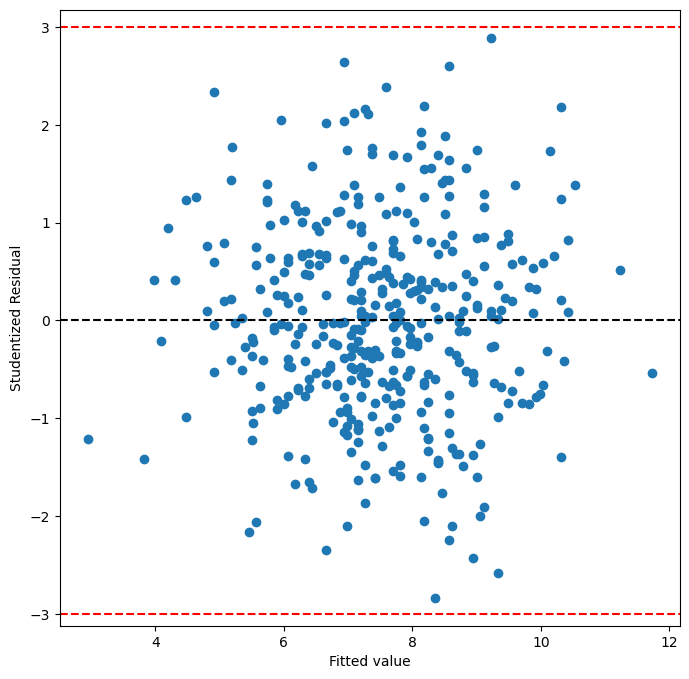

In [36]:
studentized_residual = studentize_residual(X.shape[0],
                                           2,
                                           results.resid,
                                           results.get_influence().hat_matrix_diag)
_, ax = subplots(figsize=(8,8))
ax.scatter(results.fittedvalues, studentized_residual)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Studentized Residual')
ax.axhline(0, c='k', ls='--')
ax.axhline(3, c='r', ls='--')
ax.axhline(-3, c='r', ls='--');

42


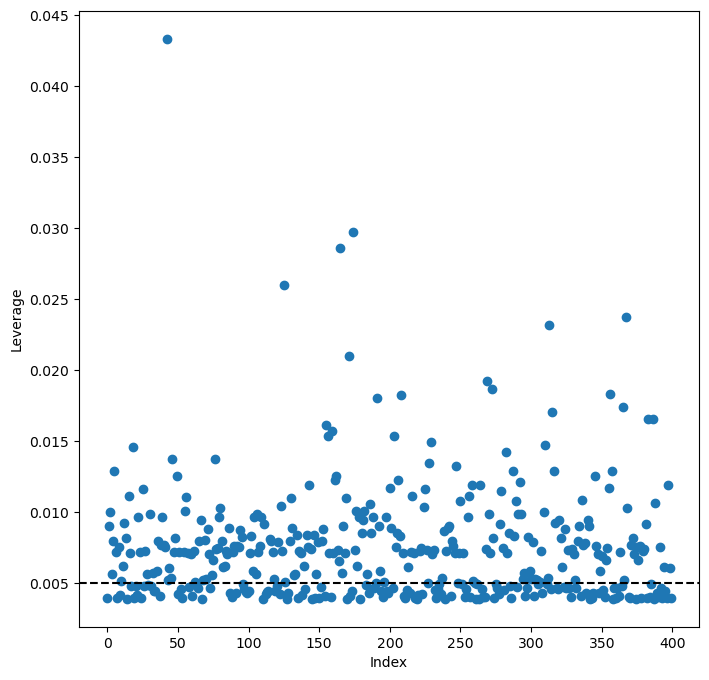

In [37]:
infl = results.get_influence()
_, ax = subplots(figsize=(8,8))
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
print(np.argmax(infl.hat_matrix_diag))
ax.axhline(2 / X.shape[0], c='k', ls='--');

**A:**
- *Outlier*: from the *Studentized Residual vs. Fitted Values*, we can see that there is no points lying outside of the cutoff, meaning no outliers
- *Leverage*: There is no particular abnormalities in the *Leverage vs. Index* graph except for a few particular points above 0.025. However, taking the cutoff as a hard limit shows that there are plenty leverage points \
(*I am unsure if this hard limit should be used as an indicator. It does make sense in a way that we are severely simplifying the true model, hence the amount of leverage points*)

##### 11. In this problem we will investigate the $t$-statistic for the null hypothesis $ H_0 : \beta = 0 $ in simple linear regression without any intercept. To begin, we generate a predictor $x$ and a response $y$ as follows

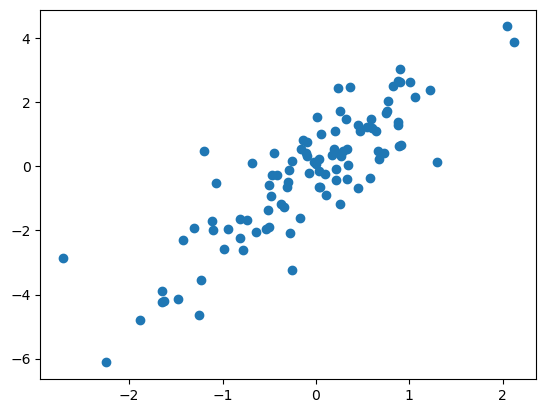

In [38]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)
_, ax = subplots()
ax.scatter(x=x, y=y);

**(a) Perform a simple linear regression of $y$ onto $x$, *without* an intercept. Report the coefficient estimate $ \hat{\beta} $, the standard error of this coefficient estimate, and the $t$-statistic and $p$-value asscoviated with the null hypothesis $ H_0 : \beta = 0 $. Comment on these results. (You can perform regression without an intercept using the keywords argument `intercept=False` to `ModelSpec()`.)**

In [39]:
model = sm.OLS(y, x).fit()
summarize(model)

,coef,std err,t,P>|t|
x1,1.9762,0.117,16.898,0.0


In [40]:
model.conf_int(alpha=0.05)

array([[1.74419143, 2.20829332]])

**A:** $p$-value corresponding to the $t$-statistic suggests that the estimated coefficient is significant enough to reject the null hypothesis. There exists a relationship between $x$ and $y$. \
The estimated coefficient $ \hat{\beta} $ is very close to the true value, and lies well within the 95% confidence interval. \
The standard error is relatively small compare to the coefficient, implying that it is quite precise.

**(b) Now perform a simple linear regression of $x$ onto $y$ without an intercept, and report the coefficient estimate, its standard error, and the corresponding $t$-statistic and $p$-value associated with the null hypothesis $ H_0 : \beta = 0 $. Comment on these results.**

In [41]:
model = sm.OLS(x, y).fit()
summarize(model)

,coef,std err,t,P>|t|
x1,0.3757,0.022,16.898,0.0


In [42]:
model.conf_int(alpha=0.05)

array([[0.33162375, 0.41986361]])

**A:** We obtained the same $t$-statistic and $p$-value. With a non-zero coefficient, we can reject the null hypothesis. There is a relationship between $y$ and $x$. \
The estimated coefficient, however, is not quite precise. Even the confidence interval does not include the true value $ \beta = 0.5 $. \
The standard error is also significantly smaller compared to previous model. \
(** \
Detail for the why the estimated coefficient is not close to 0.5 can be found at the last question at: https://chatgpt.com/share/4abcb6d0-f343-4128-a0e2-3ca995490917)

**(c) What is the relationship between the results obtained in $(a)$ and $(b)$?**

***Note: This is not my answer, this was an answer provided by ChatGPT4o, public version as of July 2024.*** I am including this since it provided some great insights to the results that we have for (b). However, this might not be correct. <br><br>
Regression $y$ onto $x$: <br>
$ y = 2x + \epsilon $ <br>
Regression $x$ onto $y$: <br>
$ x = \hat{\gamma_1} y + \epsilon' $ <br>
The correlation coefficient between $x$ and $y$ is given by: <br>
$ r = \frac{ Cov(x, y) }{ \sqrt{Var(x) Var(y)} } $ <br>
Given that $x$ was sampled from normal distribution, $y$ onto $x$ model, and assuming $ \epsilon \sim \mathcal{N}(0, 1) $:
- $ Var(x) = 1 $  
- $ Var(y) = 4 Var(x) + Var(\epsilon) = 4 + Var(\epsilon) = 5 $ <br>
<!-- end list -->
$ \Rightarrow r = \frac{2}{\sqrt{5}} $ <br>
So: <br>
$ \hat{\beta_1} = \frac{Cov(x, y)}{Var(x)} = \frac{r \cdot SD(x) \cdot SD(y)}{Var(x)} = r \cdot \frac{SD(y)}{SD(x)} = r \cdot \frac{\sqrt{Var(y)}}{\sqrt{Var(x)}} = \frac{2}{\sqrt{5}} \cdot \sqrt{5} = 2 $  <br>
$ \hat{\gamma_1} = \frac{Cov(x, y)}{Var(y)} = \frac{r \cdot SD(x) \cdot SD(y)}{Var(y)} = r \cdot \frac{SD(x)}{SD(y)} = r \cdot \frac{\sqrt{Var(x)}}{\sqrt{Var(y)}} = \frac{2}{\sqrt{5}} \cdot \frac{1}{\sqrt{5}} = \frac{2}{5} = 0.4 $ <br>
Both expected estimates are very close to the result that we got from (a) and (b)

**(d)  For the regression of $Y$ onto $X$ without an intercept, the $t$-statistic for $H_0 = \beta = 0$ takes the form $\hat{\beta} / SE(\hat{\beta})$, where $\hat{\beta}$ is given by $(3.38)$, and where $$SE(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^n{(y_i - x_i \hat{\beta})}}{(n-1) \sum_{i'=1}^n{x_{i'}^2}}}.$$ (These formulas are slightly different from those given in Section $3.1.1$ and $3.1.2$, since here we are performing regression without an intercept.) Show algebraically, and confirm numerically in $R$, that the $t$-statistic can be written as $$\frac{(\sqrt{n - 1}) \sum_{i=1}^n{x_i y_i}}{\sqrt{(\sum_{i=1}^n{x_i^2})(\sum_{i'=1}^n{y_{i'}^2}) - (\sum_{i'=1}^n{x_{i'} y_{i'}})^2}}$$** 

**A:** All notation $ \sum_{i = 1}^{n} $ will be simplified to $ \sum $
$$
\begin{align}
t
 & = \frac{\hat{\beta}}{SE(\hat{\beta})} \\
 & = \frac{\sum{x_i y_i}}{\sum{x_i^2}} \cdot \sqrt{\frac{(n - 1) \sum{x_i^2}}{\sum{(y_i - x_i \hat{\beta})^2}}} \\
 & = \frac{(\sqrt{n - 1}) \sum{x_i y_i}}{\sqrt{\sum{x_i^2} \cdot \sum{(y_i - x_i \hat{\beta})^2}}}
\end{align}
$$
Simplifying the radicand of the denominator:
$$
\begin{align}
 & = \sum{x_i^2} \cdot \sum{(y_i - x_i \hat{\beta})^2} \\
 & = \sum{x_i^2} \cdot \sum{[y_i^2 - 2 x_i y_i \hat{\beta} + (x_i \hat{\beta})^2]} \\
 & = \sum{x_i^2} \cdot \sum{y_i^2}  - \sum{x_i^2} \cdot \sum{[2 x_i y_i \cdot \frac{\sum{x_i y_i}}{\sum{x_i^2}}]} + \sum{x_i^2} \cdot (\frac{\sum{x_i y_i}}{\sum{x_i^2}})^2 \\
 & = (\sum{x_i^2})(\sum{y_i^2}) - (\sum{x_i^2})(2\sum{x_i y_i})\frac{(\sum{x_i y_i})}{(\sum{x_i^2})} + (\sum{x_i y_i})^2 \\
 & = (\sum_{i=1}^n{x_i^2})(\sum_{i=1}^n{y_i^2}) - (\sum_{i=1}^n{x_i y_i})^2
\end{align}
$$

Hence:
$$ t = \frac{(\sqrt{n - 1}) \sum_{i=1}^n{x_i y_i}}{\sqrt{(\sum_{i=1}^n{x_i^2})(\sum_{i'=1}^n{y_{i'}^2}) - (\sum_{i'=1}^n{x_{i'} y_{i'}})^2}} $$

From the `summary()` of each model $(a)$ and $(b)$, we can see that both models share the same $t$-statistic: 16.898.

**(e) Using the result from $(d)$, argue that the $t$-statistic for the regression of `y` onto `x` is the same result as the $t$-statistic for the regression of `x` onto `y`.**

**A:** In the equation for $t$-statistic, switching the role of $x$ and $y$ (of the same dataset) does not change the result of the equation.

**(f) In $R$, who that when regression is performed $with$ an intercept, the $t$-statistic for $ H_0 : \beta_1 = 0 $ is the same for the regression of `y` onto `x` as it is for the regression of `x` onto `y`.**

In [43]:
x_with_intercept = pd.DataFrame({'intercept': np.ones(x.shape[0]),
                                 'beta_1': x})
model = sm.OLS(y, x_with_intercept).fit()
summarize(model)

,coef,std err,t,P>|t|
intercept,-0.0760,0.101,-0.756,0.451
beta_1,1.9686,0.118,16.734,0.000


In [44]:
y_with_intercept = pd.DataFrame({'intercept': np.ones(y.shape[0]),
                                 'gamma_1': y})
model = sm.OLS(x, y_with_intercept).fit()
summarize(model)

,coef,std err,t,P>|t|
intercept,0.0095,0.044,0.216,0.829
gamma_1,0.3763,0.022,16.734,0.000


**A:** Both models, again, share the same $t$-statistic for their coefficient.

##### 12. This problem involves simple linear regression without an intercept.

**(a) Recall that the coefficient estimate $\hat{\beta}$ for the linear regression of $Y$ onto $X$ without an intercept is given by $(3.38)$. Under what circumstance is the coefficient estimate for the regression of $X$ onto $Y$ the same as the coefficient estimate for the regression of $Y$ onto $X$?**

**A:** $X$ onto $Y$ model: <br>
$ \hat{y} = \beta_1 x + \epsilon $ <br>
Where: <br>
$ \beta_1 = (\sum_{i=1}^n{x_i y_i}) / (\sum_{i'=1}^n{x_{i'}^2}) $ <br>
Similarly, for $Y$ onto $X$ model: <br>
$ \hat{x} = \gamma_1 y + \epsilon' $ <br>
Where: <br>
$ \gamma_1 = (\sum_{i=1}^n{x_i y_i}) / (\sum_{i'=1}^n{y_{i'}^2}) $ <br>
The coefficients are equal when: <br>
$ \sum_{i'=1}^n{x_{i'}^2} = \sum_{i'=1}^n{y_{i'}^2} $ <br>
Practically, this happens when $Y$ and $X$ have perfect linear relationship, or $ Y = X$. But it can also happens when $Y$ and $X$ have the same variance with the assumption that $ \bar{Y} = \bar{X} = 0 $.

**(b) Generate an example in `Python` with $n = 100$ observations in which the coefficient estimate for the regression of $X$ onto $Y$ is $different$ $from$ the coefficient estimate for the regression of $Y$ onto $X$.**

**A:** Models that do not fit the description from $(a)$ will result in different coefficients.

In [45]:
x = rng.random(size=100)
y = 1.5 * x  # true relationship between y and x is not perfectly linear
model = sm.OLS(y, x).fit()
print('x onto y model:')
print(summarize(model))
model = sm.OLS(x, y).fit()
print('y onto x model:')
print(summarize(model))

x onto y model:
    coef       std err             t  P>|t|
x1   1.5  9.150000e-17  1.640000e+16    0.0
y onto x model:
      coef       std err             t  P>|t|
x1  0.6667  2.640000e-17  2.530000e+16    0.0


**(c) Generate an an example in `Python` with $n = 100$ observations in which the coefficient estimate for the regression of $X$ onto $Y$ is $the$ $same$ $as$ the coefficient estimate for the regression of $Y$ onto $X$.**

**A:** Model with perfect linear relationship will result in the exact same coefficient.

In [46]:
x = rng.random(size=100)
y = x
model = sm.OLS(y, x).fit()
print('x onto y model:')
print(summarize(model))
model = sm.OLS(x, y).fit()
print('y onto x model:')
print(summarize(model))

x onto y model:
    coef       std err             t  P>|t|
x1   1.0  2.340000e-17  4.280000e+16    0.0
y onto x model:
    coef       std err             t  P>|t|
x1   1.0  2.340000e-17  4.280000e+16    0.0


We can also try second case mentioned in $(a)$. The larger `size` is, the closer the distribution is to true normal, leading to a closer $variance$.

In [47]:
x = rng.normal(loc=0, scale=2.0, size=100000)
y = rng.normal(loc=0, scale=2.0, size=100000)
model_x_onto_y = sm.OLS(y, x).fit()
print(summarize(model_x_onto_y))
model_y_onto_x = sm.OLS(x, y).fit()
print(summarize(model_y_onto_x))

      coef  std err      t  P>|t|
x1  0.0024    0.003  0.751  0.453
      coef  std err      t  P>|t|
x1  0.0024    0.003  0.751  0.453


##### 13. In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator seed to set to 1 prior to starting part $(a)$ to ensure consistent results.

**(a) Using the `normal()` method of your random number generator, create a vector, `x`, containing 100 observations drawn from a $N(0, 1)$ distribution. This represents a feature, $X$.**

In [48]:
rng = np.random.default_rng(seed=1)

x = rng.normal(loc=0, scale=np.sqrt(1.0), size=100)
print(f'Shape: {x.shape}')
print(f'Mean: {np.mean(x)}')
print(f'Variance: {np.var(x)}')

Shape: (100,)
Mean: -0.07361212127294708
Variance: 0.7251488700949983


**(b) Using the `normal()` method, create a vector, `eps`, containing 100 observations drawn from a $N(0, 0.25) distribution - a normal distribution iwht mean zero and variance 0.25.**

In [49]:
eps = rng.normal(loc=0, scale=np.sqrt(0.25), size=100)
print(f'Shape: {eps.shape}')
print(f'Mean: {np.mean(eps)}')
print(f'Variance: {np.var(eps)}')

Shape: (100,)
Mean: -0.03685640575816631
Variance: 0.24604461881030898


**(c) Using `x` and `eps`, generate a vector `y` according to the model $$ Y = -1 + 0.5 X + \epsilon $$ What is the length of the vector `y`? What are the values of $\beta_0$ and $\beta_1$ in this linear model?**

In [50]:
y = - 1 + 0.5 * x + eps
y.shape

(100,)

**A:**
- Length of `y` is 100.
- $\beta_0 = 1$ 
- $\beta_1 = 0.5$ 

**(d) Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.**

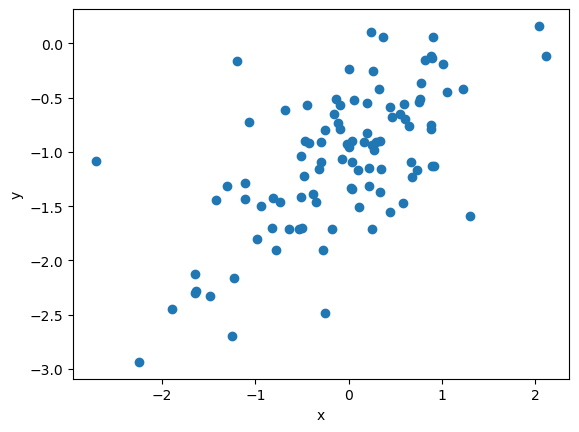

In [51]:
_, ax = subplots()
ax.scatter(x=x, y=y)
ax.set_xlabel('x')
ax.set_ylabel('y');

**A:** We can see that there exist a linear relationship between `x` and `y`. However, due to the *irreducible error* `eps`, the intercept does not line up with its expected value of -1.

**(e) Fit a least squares linear model ot predict `y` using `x`. Comment on the model obtained. How do $\hat{\beta_0}$ and $\hat{\beta_1}$ compare to $\beta_0$ and $\beta_1$?**

In [52]:
x_with_intercept = pd.DataFrame({'intercept': np.ones(x.shape[0]),
                                 'beta_1': x})
model = sm.OLS(y, x_with_intercept).fit()
summarize(model)

,coef,std err,t,P>|t|
intercept,-1.0380,0.050,-20.647,0.0
beta_1,0.4843,0.059,8.233,0.0


**A:** Both estimates for the intercept and coefficient are very close to their true values with significant $p$-value.

**(f) Display the least squares line on the scatterplot obtained in $(d)$. Draw the population regression line on the plot, in a different color. Use the `legend()` method of the axes to create an appropriate legend.**

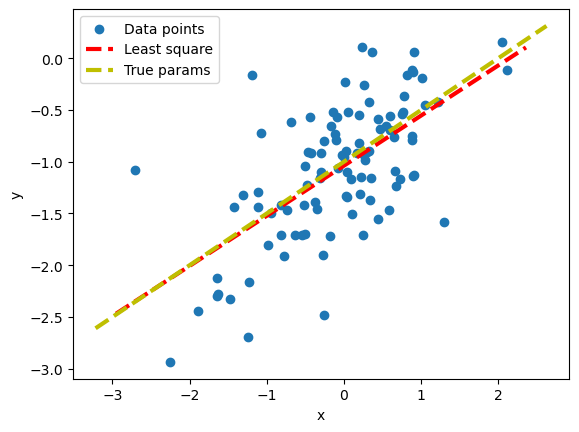

In [53]:
intercept, beta_1 = model.params

_, ax = subplots()
ax.scatter(x=x, y=y)
ax.set_xlabel('x')
ax.set_ylabel('y')
abline(ax, intercept, beta_1, 'r--', linewidth=3)
abline(ax, -1, 0.5, 'y--', linewidth=3)
ax.legend(['Data points', 'Least square', 'True params']);

**(g) Now fit a polynomial regression model that predicts `y` using `x` and `x^2`. Is there evidence that the quadratic term improves the model fit? Explain your answer.**

In [54]:
x_quadratic = pd.DataFrame({'intercept': np.ones(x.shape[0]),
                            'beta_1': x,
                            'beta_2': np.square(x)})
model_quadratic = sm.OLS(y, x_quadratic).fit()
summarize(model_quadratic)

,coef,std err,t,P>|t|
intercept,-1.0364,0.060,-17.399,0.000
beta_1,0.4831,0.063,7.647,0.000
beta_2,-0.0024,0.045,-0.052,0.959


In [55]:
print("R-square")
print(f"Linear model: {model.rsquared}")
print(f"Quadratic model: {model_quadratic.rsquared}")
print("MSE total")
print(f"Linear model: {model.mse_total}")
print(f"Quadratic model: {model_quadratic.mse_total}")

R-square
Linear model: 0.4088921802988543
Quadratic model: 0.40890856070369974
MSE total
Linear model: 0.42014190232788573
Quadratic model: 0.42014190232788573


**A:** There is almost no improvements at all from the model (observing $R$-squared and $MSE$). In fact, $p$-value for $\beta_2$ from quadratic model agrees that the additional term is not helping much.

**(h) Repeat $(a)$-$(f)$ after modifying the data generation process in such a way that there is less noise in the data. The model $(3.39)$ should remain the same. You can do this by decreasing the variable of the normal distribution used to generate the error term $\epsilon$ in $(b)$. Describe your results.**

In [56]:
rng = np.random.default_rng(seed=1)

x = rng.normal(loc=0, scale=np.sqrt(1.0), size=100)
print('x')
print(f'Shape: {x.shape}')
print(f'Mean: {np.mean(x)}')
print(f'Variance: {np.var(x)}')

# Reduce the epsilon variance from 0.25 to 0.1
eps = rng.normal(loc=0, scale=np.sqrt(0.1), size=100)
print('eps')
print(f'Shape: {eps.shape}')
print(f'Mean: {np.mean(eps)}')
print(f'Variance: {np.var(eps)}')

y = - 1 + 0.5 * x + eps
print("y")
print(f"Shape: {y.shape}")

x
Shape: (100,)
Mean: -0.07361212127294708
Variance: 0.7251488700949983
eps
Shape: (100,)
Mean: -0.02331003771263012
Variance: 0.09841784752412358
y
Shape: (100,)


**A:** Since there was no change to the model for $y$, all coefficient remain the same.

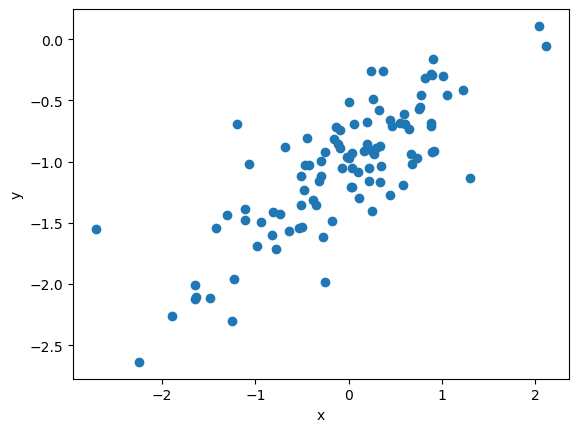

In [57]:
_, ax = subplots()
ax.scatter(x=x, y=y)
ax.set_xlabel('x')
ax.set_ylabel('y');

**A:** The graph is significantly less 'noisy' with points wrapping closer to the line $y = -1 + 0.5x$. However, there are still points that are further away due to the nature of inherent error from $\epsilon$

In [58]:
x_with_intercept = pd.DataFrame({'intercept': np.ones(x.shape[0]),
                                 'beta_1': x})
cleaner_model = sm.OLS(y, x_with_intercept).fit()
summarize(cleaner_model)

,coef,std err,t,P>|t|
intercept,-1.0240,0.032,-32.206,0.0
beta_1,0.4901,0.037,13.173,0.0


**A:** Both estimators are very close to their respective true values, with a significant $p$-value. However, *standard error* is also lower comparing to previous model thanks to the error reduction from $\epsilon$.

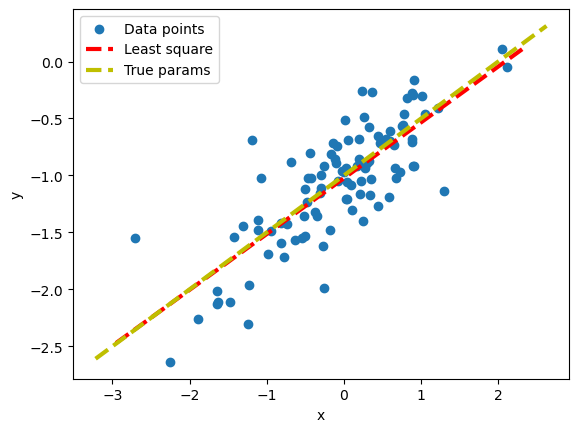

In [59]:
intercept, beta_1 = cleaner_model.params

_, ax = subplots()
ax.scatter(x=x, y=y)
ax.set_xlabel('x')
ax.set_ylabel('y')
abline(ax, intercept, beta_1, 'r--', linewidth=3)
abline(ax, -1, 0.5, 'y--', linewidth=3)
ax.legend(['Data points', 'Least square', 'True params']);

**A:** Consequently from better estimators, the *Least Squared Line* is now closer to the true model.

**(i) Repeat $(a)$-$(f)$ after modifying the data generation process in such a way that there is $more$ $noise$ in the data. The model $(3.39)$ should remain the same. You can do this by increasing the variable of the normal distribution used to generate the error term $\epsilon$ in $(b)$. Describe your results.**

In [60]:
rng = np.random.default_rng(seed=1)

x = rng.normal(loc=0, scale=np.sqrt(1.0), size=100)
print('x')
print(f'Shape: {x.shape}')
print(f'Mean: {np.mean(x)}')
print(f'Variance: {np.var(x)}')

# Reduce the epsilon variance from 0.25 to 0.5
eps = rng.normal(loc=0, scale=np.sqrt(0.5), size=100)
print('eps')
print(f'Shape: {eps.shape}')
print(f'Mean: {np.mean(eps)}')
print(f'Variance: {np.var(eps)}')

y = - 1 + 0.5 * x + eps
print("y")
print(f"Shape: {y.shape}")

x
Shape: (100,)
Mean: -0.07361212127294708
Variance: 0.7251488700949983
eps
Shape: (100,)
Mean: -0.05212282888352465
Variance: 0.49208923762061796
y
Shape: (100,)


**A:** Similar to $(h)$, there is no change to the true parameters for $y$.

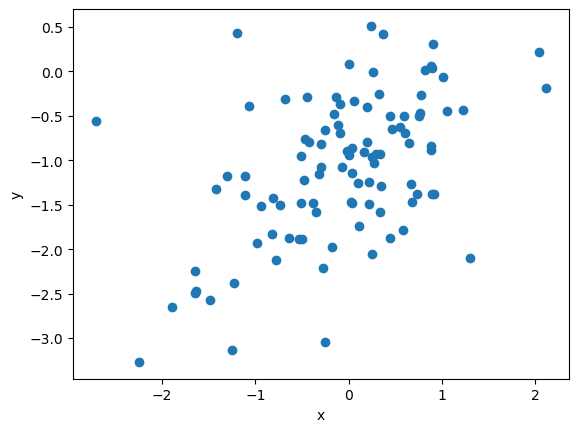

In [61]:
_, ax = subplots()
ax.scatter(x=x, y=y)
ax.set_xlabel('x')
ax.set_ylabel('y');

**A:** The graph is as expected (opposite of $(h)$), points scatter more around the true line.

In [62]:
x_with_intercept = pd.DataFrame({'intercept': np.ones(x.shape[0]),
                                 'beta_1': x})
noisy_model = sm.OLS(y, x_with_intercept).fit()
summarize(noisy_model)

,coef,std err,t,P>|t|
intercept,-1.0538,0.071,-14.821,0.0
beta_1,0.4778,0.083,5.744,0.0


**A:** Both estimators are still very close to their true values with a significant $p$-value. But *standard error* have increased.

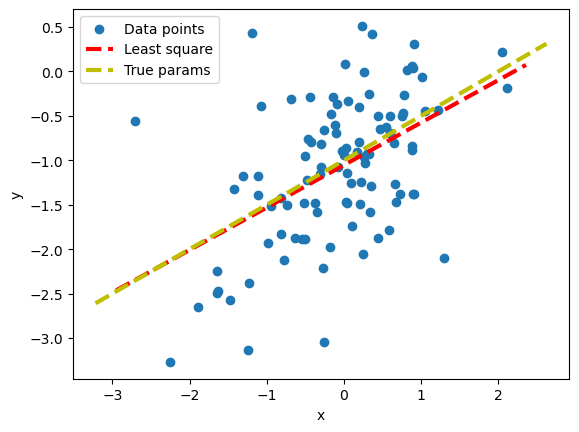

In [63]:
intercept, beta_1 = noisy_model.params

_, ax = subplots()
ax.scatter(x=x, y=y)
ax.set_xlabel('x')
ax.set_ylabel('y')
abline(ax, intercept, beta_1, 'r--', linewidth=3)
abline(ax, -1, 0.5, 'y--', linewidth=3)
ax.legend(['Data points', 'Least square', 'True params']);

**A:** The *Least Squared Line* strays from the true line more than of both the original model and that of $(h)$.

**(j) What are the confidence intervals for $\beta_0$ and $\beta_1$ based on the original data set, and the less noisy data set? Comment on your results.**

- Original model:

In [64]:
model.conf_int(alpha=0.05)

,0,1
intercept,-1.137782,-0.938244
beta_1,0.367565,0.601017


- Less noisy model:

In [65]:
cleaner_model.conf_int(alpha=0.05)

,0,1
intercept,-1.087141,-0.960942
beta_1,0.416241,0.563889


- Noisier model:

In [66]:
noisy_model.conf_int(alpha=0.05)

,0,1
intercept,-1.194853,-0.912663
beta_1,0.312709,0.642859


**A:** The range of the confidence interval is given as: <br>
$ CI(\hat{\beta_1}) = (\hat{\beta_1 \pm SE(\hat{\beta_1})}) $ <br>
where $ SE(\hat{\beta_1}) $ is given by $11(d)$, <br>
Since $SE$ has a positive correlation with $y$, it, in turn, correlates positively with $SE(\epsilon)$. <br>
We can see that the confidence intervals behave as expected with range of noisy model > original model > less noisy model. 

##### 14. This problem focuses on the $colinearity$ problem.

**(a) Perform the following commands in `Python`:**

In [67]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

**The last line corresponds to creating a linear model in which `y` is a function of `x1` and `x2`. Write out the form of the linear model. What are the regression coefficients?**

**A:** $ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon $ <br>
Where:
- $ \beta_0 = 2 $
- $ \beta_0 = 2 $
- $ \beta_0 = 0.3 $
- $ \epsilon \sim N(0, 1) $

**(b) What is the correlation between `x1` and `x2`? Create a scatterplot displaying the relationship between the variables.**

In [68]:
np.corrcoef(x1, x2)

array([[1.       , 0.7723245],
       [0.7723245, 1.       ]])

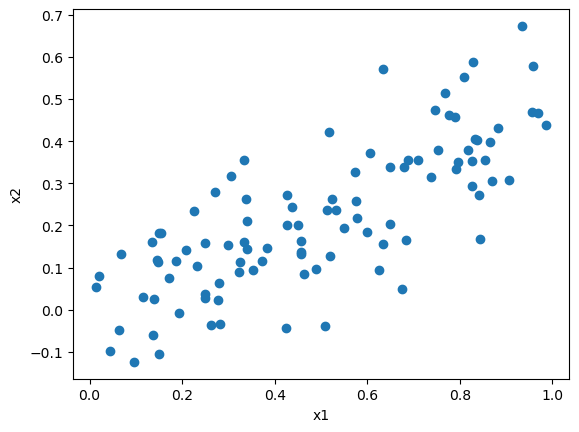

In [69]:
_, ax = subplots()
ax.scatter(x=x1, y=x2)
ax.set_xlabel('x1')
ax.set_ylabel('x2');

**A:** The graph, as expected, shows the equation $ x_2 = 0.5  x_1 + \epsilon $. <br>
The off diagonal entries of the `correcoef` matrix agrees that there is a high correlation between `x1` and `x2` at 0.77.

**(c) Using this data, fit a least squares regression to predict `y` using `x1` and `x2`. Describe the results obtained. What are $\hat{\beta_0}$, $\hat{\beta_1}$, and $\hat{\beta_2}$? How do these relate to the true $\beta_0$, $\beta_1$, and $\beta_2$? Can you reject the null hypothesis $ H_0 : \beta_1 = 0 $? How about the null hypothesis $ H_0 : \beta_2 = 0 $?**

In [70]:
X = pd.DataFrame({'intercept': np.ones(x1.shape[0]),
                  'x1': x1,
                  'x2': x2})
model = sm.OLS(y, X).fit()
summarize(model)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


**A:** True values are:
- $\beta_0 = 2$
- $\beta_1 = 2$
- $\beta_2 = 0.3$
<!-- end list -->
Ecen though $\hat{\beta_1}$ is not so close to the true values, it has significant enough $p$-value to reject the null hypothesis $ H_0 : \beta_1 = 0 $. However, $\hat{beta_2}$ differ from its true value. $p$-value agrees that the estimation is insignificant. We failed to reject null $ H_0 : \beta_2 = 0 $.

**(d) Now fit a least squares regression to predict `y` using only `x1`. Comment on your results. Can you reject the null hypothesis $ H_0 = \beta_1 = 0 $?**

In [71]:
X = pd.DataFrame({'intercept': np.ones(x1.shape[0]),
                  'x1': x1})
model = sm.OLS(y, X).fit()
summarize(model)

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


**A:** The estimated coefficients are extremely close to their true values. $\hat{\beta}$ improved significantly. Its *standard error* also improved. Its $p$ is significant enough to reject the null hypothesis.

**(e) Now fit a least squares regression to predict `y` using only `x2`. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?**

**Note:** I will be performing test for $\beta_2$ and not $\beta_1$ as the question requires. I'm assuming this is a typo from the book.

In [72]:
X = pd.DataFrame({'intercept': np.ones(x2.shape[0]),
                  'x2': x2})
model = sm.OLS(y, X).fit()
summarize(model)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


**A:** The estimated coefficient is not good. It's almost 10 times its true value. However, we can still reject the null hypothesis.

**(f) Do the results obtained in $$(c)-(e)$ contradict each other? Explain your answer.**

**A:** No. Since $x_2$ itself is a function of $x_1$, the model for $y$ can be simplified to $y = f(x_1)$. Both $(d)$ and $(e)$ suggest that there is a relationship between $y$ and $x_1$, or $x_2$ individually. $(c)$ suggests that the use of $x_2$ can be simplified to $x_1$, agreeing that there is a correlation between the two variables.

**(g) Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function `np.concatenate()` to add this additional observation to each of `x1`, `x2`, and `y`.**

In [73]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

**Re-fit the linear models from $(c)$ to $(e)$ using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.**

- Model with both $x_1$ and $x_2$.

In [74]:
X = pd.DataFrame({'intercept': np.ones(x1.shape[0]),
                  'x1': x1,
                  'x2': x2})
model_full = sm.OLS(y, X).fit()
summarize(model_full)

,coef,std err,t,P>|t|
intercept,2.0618,0.192,10.720,0.000
x1,0.8575,0.466,1.838,0.069
x2,2.2663,0.705,3.216,0.002


- Model with only $x_1$.

In [75]:
X = pd.DataFrame({'intercept': np.ones(x1.shape[0]),
                  'x1': x1})
model_x1 = sm.OLS(y, X).fit()
summarize(model_x1)

,coef,std err,t,P>|t|
intercept,2.0739,0.201,10.310,0.0
x1,1.8760,0.358,5.236,0.0


- Model with only $x_2$.

In [76]:
X = pd.DataFrame({'intercept': np.ones(x2.shape[0]),
                  'x2': x2})
model_x2 = sm.OLS(y, X).fit()
summarize(model_x2)

,coef,std err,t,P>|t|
intercept,2.2840,0.151,15.088,0.0
x2,3.1458,0.524,6.008,0.0


**A:** The additional point of $x_1$ has changed the regression for complete model $ y = \hat{\beta_0} + \hat{\beta_1} x_1 + \hat{\beta_2} x_2 $. <br>
We can test if it's an outlier with the *studentized residual*. <br>
And high leverage point can be checked with *leverage statistic*, $h_i$ from equation $(3.37)$.

In [77]:
studentized_residual = studentize_residual(y.shape[0],
                                           2,  # we have 2 predictor x1 and x2
                                           model_full.resid,
                                           model_full.get_influence().hat_matrix_diag)
studentized_residual = studentized_residual.to_numpy(dtype=np.float64)
studentized_residual[-1]

2.745858865998752

100


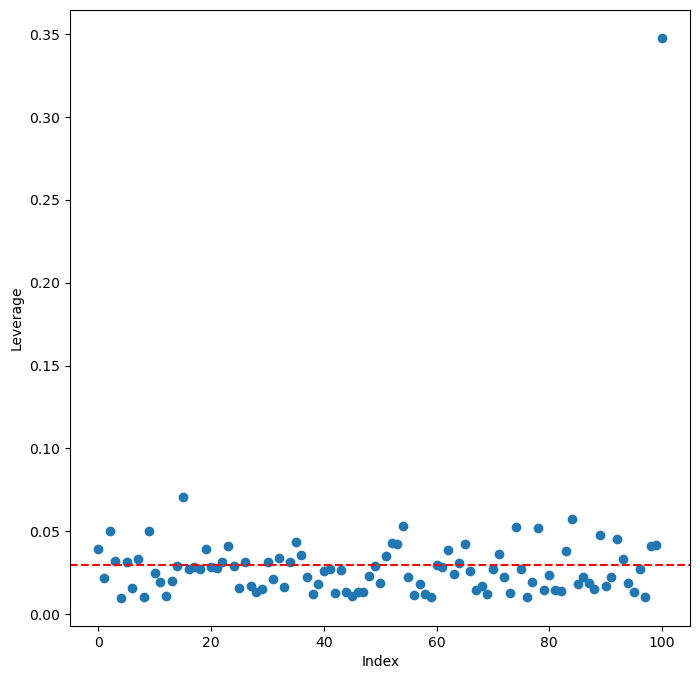

In [78]:
infl = model_full.get_influence()
_, ax = subplots(figsize=(8,8))
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
print(np.argmax(infl.hat_matrix_diag))
ax.axhline((2 + 1) / X.shape[0], c='r', ls='--');

**A:** For the model with both predictors, the new point is not an *outlier* since its *studentized residual* has a value of 2.7, which is less than 3. <br>
However, from the leverage graph, we can see that it is a *high leverage point*. This will affect the result of the *Least Squared Line*.
We can repeat the same process for the other two models.

##### 15. This problem involves the `Boston` data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words per capita crime rate is the response, and the other variables are the predictors.

In [79]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

**(a) For each predictor, fir a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.**

In [80]:
y = Boston['crim']
predictors = Boston.columns.delete(0)   # remove `crim`

def get_model_for_predictor(predictor):
    X = pd.DataFrame({'intercept': np.ones(y.shape[0]),
                      predictor: Boston[predictor]})
    model = sm.OLS(y, X).fit()
    return model

for col in predictors:
    model = get_model_for_predictor(col)
    print(summarize(model))

             coef  std err       t  P>|t|
intercept  4.4537    0.417  10.675    0.0
zn        -0.0739    0.016  -4.594    0.0
             coef  std err      t  P>|t|
intercept -2.0637    0.667 -3.093  0.002
indus      0.5098    0.051  9.991  0.000
             coef  std err      t  P>|t|
intercept  3.7444    0.396  9.453  0.000
chas      -1.8928    1.506 -1.257  0.209
              coef  std err       t  P>|t|
intercept -13.7199    1.699  -8.073    0.0
nox        31.2485    2.999  10.419    0.0
              coef  std err      t  P>|t|
intercept  20.4818    3.364  6.088    0.0
rm         -2.6841    0.532 -5.045    0.0
             coef  std err      t  P>|t|
intercept -3.7779    0.944 -4.002    0.0
age        0.1078    0.013  8.463    0.0
             coef  std err       t  P>|t|
intercept  9.4993    0.730  13.006    0.0
dis       -1.5509    0.168  -9.213    0.0
             coef  std err       t  P>|t|
intercept -2.2872    0.443  -5.157    0.0
rad        0.6179    0.034  17.998    0.

**A:** From $p$-value, `zn`, `indus`, `nox`, `rm`, `age`, `dis`, `rad`, `tax`, `ptratio`, `lstat`, and `medv` have statistically significant association between the predictor and the response.

In [82]:
model = get_model_for_predictor('age')
summarize(model)

,coef,std err,t,P>|t|
intercept,-3.7779,0.944,-4.002,0.0
age,0.1078,0.013,8.463,0.0


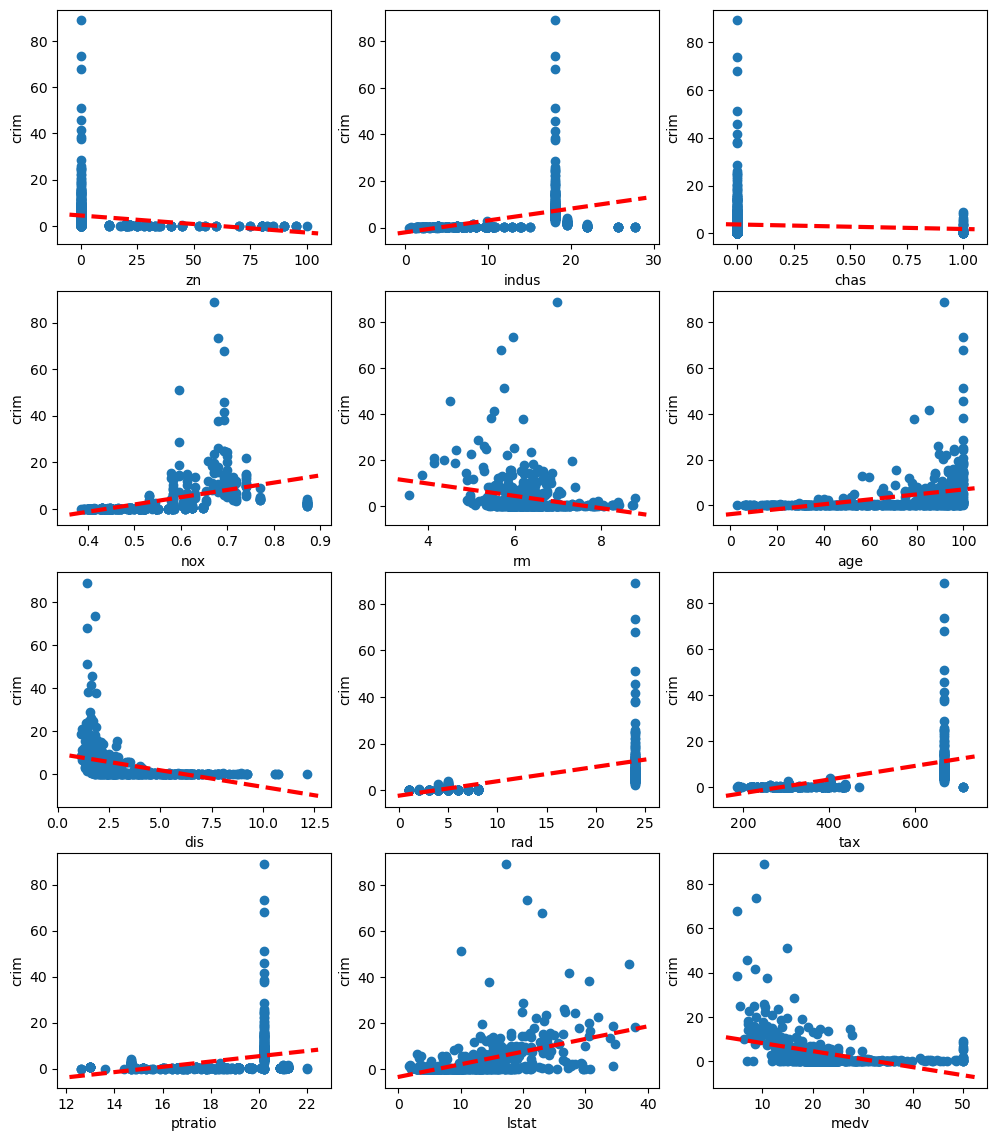

In [103]:
_, axes = subplots(4, 3, figsize=(12, 14))
model_single_predictor = []
for i, predictor in enumerate(predictors):
    row, col = divmod(i, 3)
    axes[row, col].scatter(x=Boston[predictor], y=y)
    axes[row, col].set_xlabel(predictor)
    axes[row, col].set_ylabel('crim')

    model = get_model_for_predictor(predictor)
    model_single_predictor.append(model)
    abline(axes[row, col],
       model.params['intercept'],
       model.params[predictor],
       'r--',
       linewidth=3)
    

**(b) Fit a multiple regression model to predict the response using all the predictors. Describe your results. For which predictor can we reject the null hypothesis $ H_0 : \beta_j = 0 $?**

In [104]:
X = MS(predictors).fit_transform(Boston)
model_multi_predictors = sm.OLS(y, X).fit()
summarize(model_multi_predictors)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


In [105]:
summarize(model_multi_predictors)[
    summarize(model_multi_predictors)['P>|t|'] <= 0.05
]

,coef,std err,t,P>|t|
zn,0.0457,0.019,2.433,0.015
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
medv,-0.2201,0.060,-3.678,0.000


**A:** Assuming $ \alpha = 0.05 $. From the with sufficient $p$-value above, we can reject the null hypothesis for `zn`, `dis`, `rad`, and `medv`.

**(c) How do your results from $(a)$ compare to your results from $(b)$? Create a plot displaying the univariate regression coefficients from $(a)$ on the $x$-axis, and the multiple regression coefficients from $(b)$ on the $y$-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the $x$-axis, and its coefficient estimate in the multiple linear regression model is shown on the $y$-axis.**

/var/folders/pd/8hy6tr792sb5d5lgkbz_wpp40000gn/T/ipykernel_12875/975932886.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x=[model.params[1] for model in model_single_predictor],


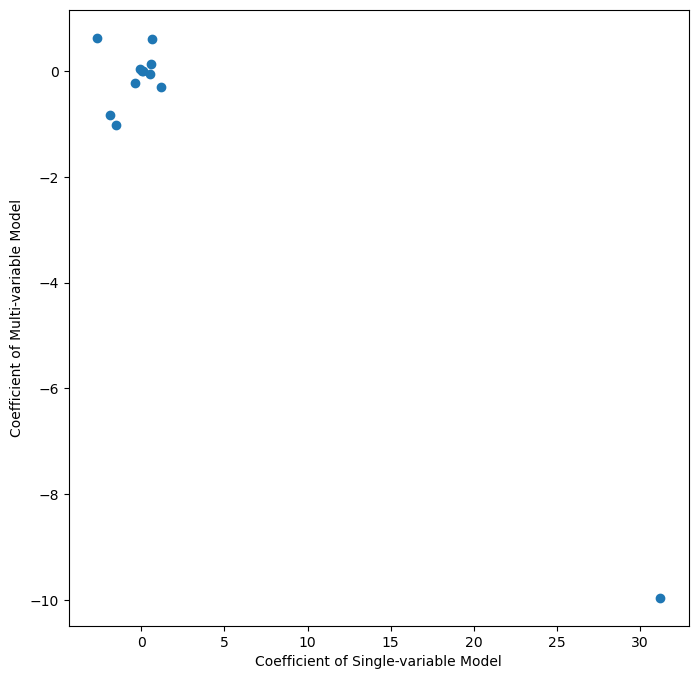

In [113]:
_, ax = subplots(figsize=(8,8))
ax.scatter(
    x=[model.params[1] for model in model_single_predictor],
    y=model_multi_predictors.params[1:]
)
ax.set_xlabel('Coefficient of Single-variable Model')
ax.set_ylabel('Coefficient of Multi-variable Model');

**A:** Single variable models from $(a)$ suggest that only one predictor is insignificant (`chas`), while multi-variable model suggests that only 4 of the predictors are significant.

**(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor $X$, fit a model of the form $$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 \beta X^3 + \epsilon \cdot $$**

In [117]:
models_non_linear = []
for predictor in predictors:
    predictor_data = Boston[predictor]
    X = pd.DataFrame({
        'intercept': np.ones(predictor_data.shape[0]),
        predictor: predictor_data,
        f'{predictor}^2': np.power(predictor_data, 2),
        f'{predictor}^3': np.power(predictor_data, 3)
    })
    model = sm.OLS(y, X).fit()
    models_non_linear.append(model)
    print(summarize(model))

               coef   std err       t  P>|t|
intercept  4.846100  0.433000  11.192  0.000
zn        -0.332200  0.110000  -3.025  0.003
zn^2       0.006500  0.004000   1.679  0.094
zn^3      -0.000038  0.000031  -1.203  0.230
             coef  std err      t  P>|t|
intercept  3.6626    1.574  2.327   0.02
indus     -1.9652    0.482 -4.077   0.00
indus^2    0.2519    0.039  6.407   0.00
indus^3   -0.0070    0.001 -7.292   0.00
                   coef       std err      t  P>|t|
intercept  3.744400e+00  3.970000e-01  9.444  0.000
chas      -4.770000e+13  1.150000e+14 -0.414  0.679
chas^2     2.385000e+13  5.770000e+13  0.414  0.679
chas^3     2.385000e+13  5.770000e+13  0.414  0.679
                coef  std err      t  P>|t|
intercept   233.0866   33.643  6.928    0.0
nox       -1279.3713  170.397 -7.508    0.0
nox^2      2248.5441  279.899  8.033    0.0
nox^3     -1245.7029  149.282 -8.345    0.0
               coef  std err      t  P>|t|
intercept  112.6246   64.517  1.746  0.081
rm  

In [125]:

for model in models_non_linear:
    model_no_intercept = summarize(model).iloc[1:]
    print(model_no_intercept[model_no_intercept['P>|t|'] < 0.05])


      coef  std err      t  P>|t|
zn -0.3322     0.11 -3.025  0.003
           coef  std err      t  P>|t|
indus   -1.9652    0.482 -4.077    0.0
indus^2  0.2519    0.039  6.407    0.0
indus^3 -0.0070    0.001 -7.292    0.0
Empty DataFrame
Columns: [coef, std err, t, P>|t|]
Index: []
            coef  std err      t  P>|t|
nox   -1279.3713  170.397 -7.508    0.0
nox^2  2248.5441  279.899  8.033    0.0
nox^3 -1245.7029  149.282 -8.345    0.0
Empty DataFrame
Columns: [coef, std err, t, P>|t|]
Index: []
           coef   std err      t  P>|t|
age^2 -0.007200  0.004000 -1.988  0.047
age^3  0.000057  0.000021  2.724  0.007
          coef  std err      t  P>|t|
dis   -15.5544    1.736 -8.960    0.0
dis^2   2.4521    0.346  7.078    0.0
dis^3  -0.1186    0.020 -5.814    0.0
Empty DataFrame
Columns: [coef, std err, t, P>|t|]
Index: []
Empty DataFrame
Columns: [coef, std err, t, P>|t|]
Index: []
              coef  std err      t  P>|t|
ptratio   -82.3605   27.644 -2.979  0.003
ptratio^2   4.63

**A:** From the table above, we can see that there are many predictors whose $p$-value is non-linear. There is evidence for the non-linear association.